In [1]:
import os
import pandas as pd
import chardet
import numpy as np
import unicodedata
import re

from cleaning_utils import delete, normalize_all_text_columns, fill_rate
from analysis_utils import plot_missing_bar, plot_numeric_histograms


/Users/brunocoulet/Documents/projets/apartment-hunter/analysis_utils.py:155: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
  Applique $\log(1+y)$ à la target si "log1p".
/Users/brunocoulet/Documents/projets/apartment-hunter/analysis_utils.py:246: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
  Applique $\log(1+y)$ si "log1p".


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <p>Detection du format d'encodage du fichier source</p>
</div>

In [3]:
with open('raw_data/houses_madrid.csv', 'rb') as file :
    encodage = chardet.detect(file.read(10000))

print(encodage)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <p>Import du fichier source avec le bon encodage</p>
</div>

In [4]:
pd.options.display.max_columns = None
df = pd.read_csv("raw_data/houses_Madrid.csv", encoding='utf-8')
# df = pd.read_csv("raw_data/houses_Madrid.csv", encoding='utf_8_sig')

In [5]:
df.head(1)

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,"Calle de Godella, 64",False,Calle de Godella,64,NaN,3,False,NaN,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,471,NaN,False,85000,1328,True,HouseType 1: Pisos,False,False,1960.0,NaN,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,False,NaN,NaN,NaN,NaN,False,True,False,False


<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <p>La colonne 'id' (index 1) ne contient que des valeurs unique, elle peut servir de colonne index<br>
    La colonne (index 0) n'apporte rien, on peut la supprimer</p>
</div>

In [6]:
df = pd.read_csv("raw_data/houses_Madrid.csv", index_col=1)
# df = df.drop(df.columns[0], axis=1)
df.head(1)

,Unnamed: 0,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21742,0,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,"Calle de Godella, 64",False,Calle de Godella,64,NaN,3,False,NaN,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,471,NaN,False,85000,1328,True,HouseType 1: Pisos,False,False,1960.0,NaN,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,False,NaN,NaN,NaN,NaN,False,True,False,False


In [7]:
dropped_cols = []
# Attention : la fonction retourne un nouveau DataFrame, il faut le réaffecter.
df = delete(df, df.columns[0], dropped_cols)
df.head(1)

,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,"Calle de Godella, 64",False,Calle de Godella,64,NaN,3,False,NaN,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,471,NaN,False,85000,1328,True,HouseType 1: Pisos,False,False,1960.0,NaN,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,False,NaN,NaN,NaN,NaN,False,True,False,False


<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">IL Y A DES ACCENTS ! ! !<br>
    Nettoyage de l'alphabet et conversion en minuscules</p>
</div>



In [8]:
df = normalize_all_text_columns(df)
# Appliquer la normalisation au DataFrame après l'importation

Normalisation des colonnes de texte : ['title', 'subtitle', 'raw_address', 'street_name', 'street_number', 'floor', 'is_floor_under', 'neighborhood_id', 'operation', 'house_type_id', 'is_new_development', 'has_central_heating', 'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden', 'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room', 'is_accessible', 'has_green_zones', 'energy_certificate', 'is_parking_included_in_price', 'is_orientation_north', 'is_orientation_west', 'is_orientation_south', 'is_orientation_east']


In [9]:
df.head(5)

,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21742,"piso en venta en calle de godella, 64","san cristobal, madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,"calle de godella, 64",False,calle de godella,64,NaN,3,False,NaN,neighborhood 135: san cristobal (1308.89 €/m2)...,sale,471,NaN,False,85000,1328,True,housetype 1: pisos,False,False,1960.0,NaN,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,False,NaN,NaN,NaN,NaN,False,True,False,False
21741,piso en venta en calle de la del manojo de rosas,"los angeles, madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,NaN,calle de la del manojo de rosas,True,calle de la del manojo de rosas,NaN,NaN,4,False,NaN,neighborhood 132: los angeles (1796.68 €/m2) -...,sale,666,NaN,False,129900,1856,True,housetype 1: pisos,True,False,NaN,NaN,NaN,NaN,NaN,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,en tramite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21740,"piso en venta en calle del talco, 68","san andres, madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,NaN,"calle del talco, 68",False,calle del talco,68,NaN,1,False,NaN,neighborhood 134: san andres (1617.18 €/m2) - ...,sale,722,NaN,False,144247,1535,True,housetype 1: pisos,False,False,NaN,False,True,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21739,piso en venta en calle pedro jimenez,"san andres, madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,NaN,calle pedro jimenez,True,calle pedro jimenez,NaN,NaN,bajo,True,NaN,neighborhood 134: san andres (1617.18 €/m2) - ...,sale,583,NaN,False,109900,1717,True,housetype 1: pisos,False,False,1955.0,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,en tramite,False,NaN,NaN,NaN,NaN,False,False,True,False
21738,piso en venta en carretera de villaverde a val...,"los rosales, madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,NaN,carretera de villaverde a vallecas,True,carretera de villaverde a vallecas,NaN,NaN,4,False,NaN,neighborhood 133: los rosales (1827.79 €/m2) -...,sale,1094,NaN,False,260000,2407,True,housetype 1: pisos,False,False,2003.0,NaN,NaN,NaN,True,True,True,True,NaN,True,NaN,NaN,True,NaN,NaN,NaN,True,en tramite,True,NaN,NaN,True,0.0,True,True,True,True


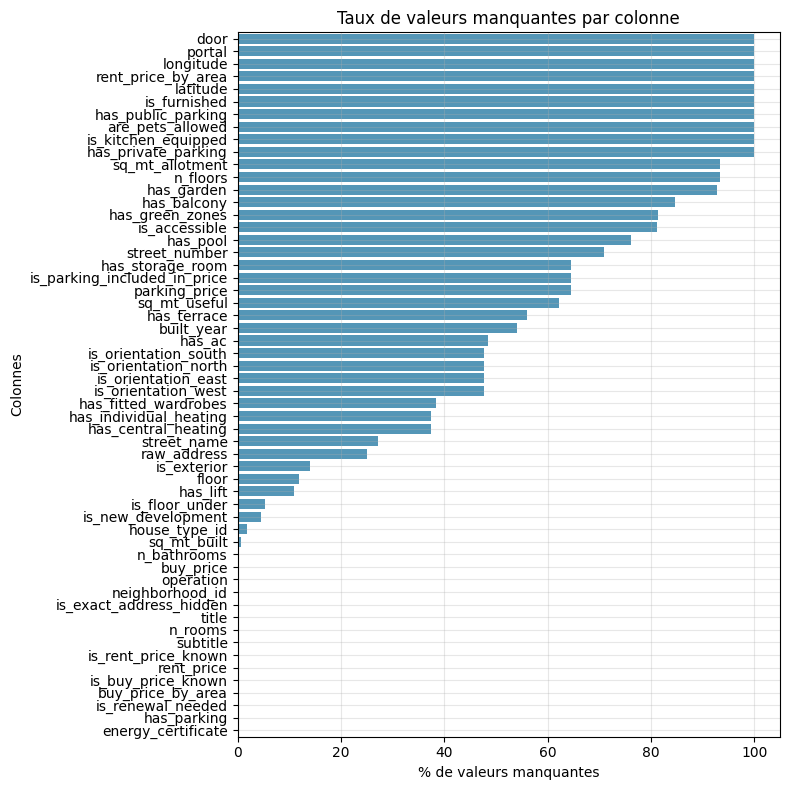

In [10]:
plot_missing_bar(df, figsize=(8,8))

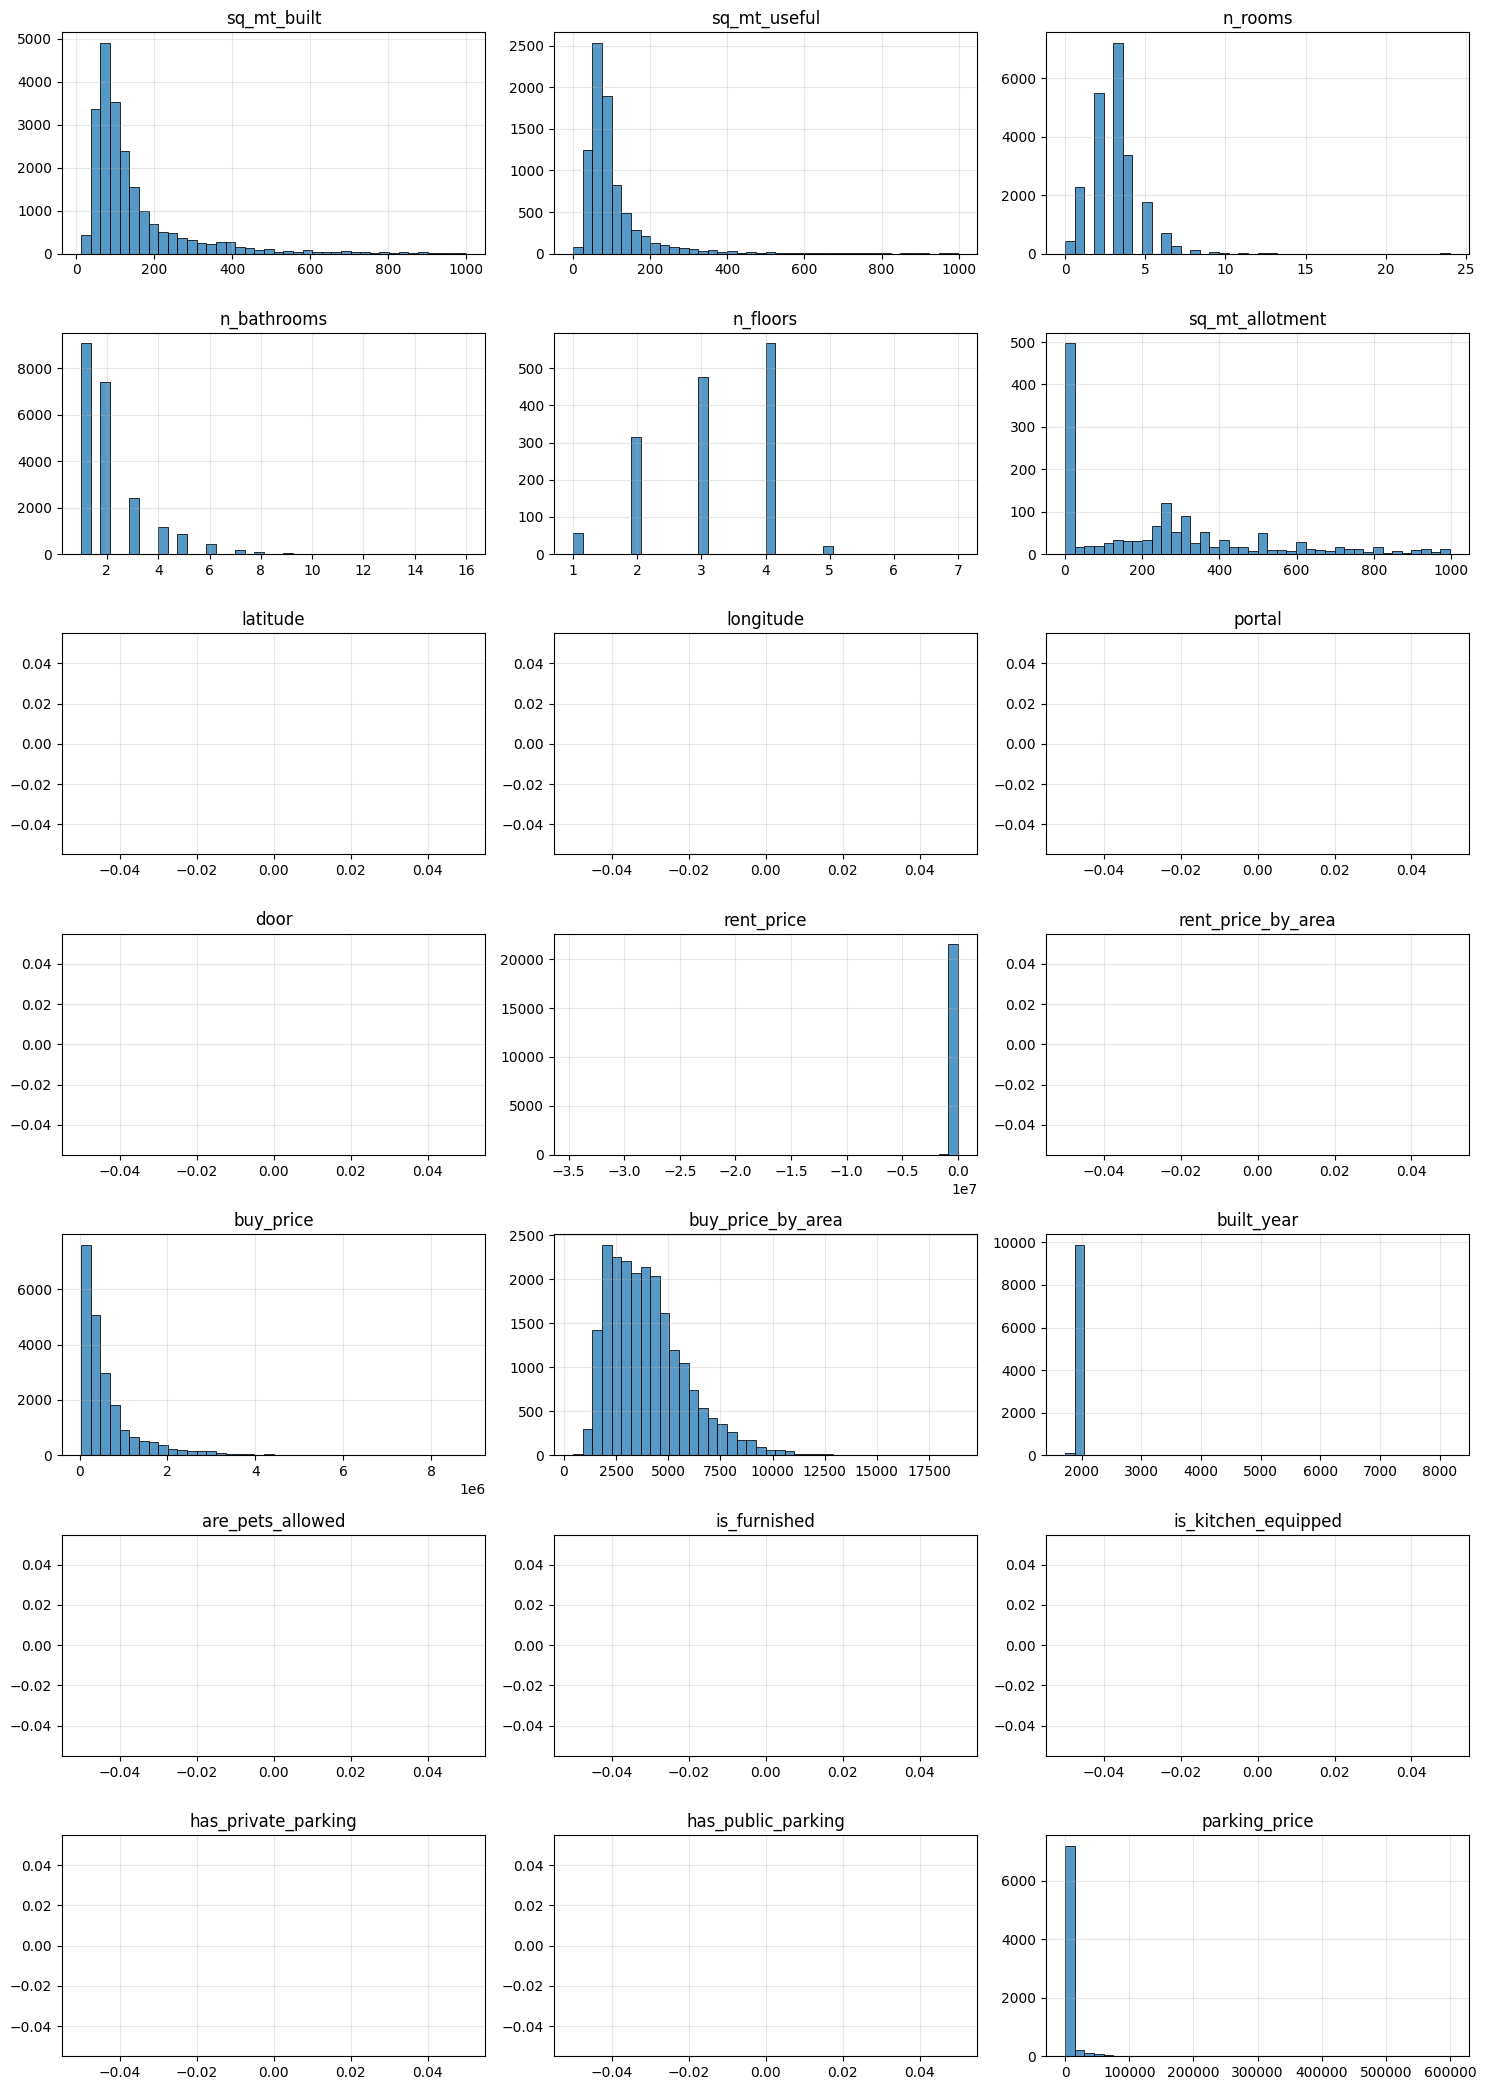

In [11]:
plot_numeric_histograms(df, bins=40, n_cols=3)

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Supression des doublons</h3>
</div>


In [160]:
before = len(df)
df = df.drop_duplicates()
print("Doublons supprimés:", before - len(df))

Doublons supprimés: 183


In [161]:
df.shape

(21559, 56)

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>colonnes vides</h3>
    <p>A supprimer</p>
</div>


In [162]:
empty = df.columns[df.isna().all()].tolist()

for col in empty:
    df = delete(df, col, dropped_cols)
dropped_cols




['Unnamed: 0',
 'latitude',
 'longitude',
 'portal',
 'door',
 'rent_price_by_area',
 'are_pets_allowed',
 'is_furnished',
 'is_kitchen_equipped',
 'has_private_parking',
 'has_public_parking']

In [163]:
df.shape

(21559, 46)

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Variables à valeurs unique, une seule modalité</h3>
    <p>A supprimer</p>
</div>

In [164]:
# Détection des variables qui n'ont qu'une seule modalité
# NaN étant considéré comme une modalité .....  (dropna=False)
unique_value_cols = df.columns[df.nunique(dropna=False)==1].tolist()
unique_value_cols

['operation', 'is_rent_price_known', 'is_buy_price_known']

In [165]:
for col in unique_value_cols:
    df = delete(df, col, dropped_cols)
df.shape

(21559, 43)

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Variables non correllées à la target</h3>
    <p>à supprimer</p>
</div>


In [166]:
useless_cols = ['raw_address',
                'street_name',
                'street_number'
]

for col in useless_cols:
    df = delete(df, col, dropped_cols)
df.shape

(21559, 40)

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Loyer négatif</h3>
    <p>enlever le signe - devant la valeur</p>
</div>

In [167]:
(df['rent_price'] <= 0).sum()


np.int64(2642)

In [168]:
# Affiche les 2642 lignes où le prix de location est inférieur ou égal à 0
df_neg = df[df['rent_price'] <= 0]
df_neg.tail(5)

,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,is_exact_address_hidden,floor,is_floor_under,neighborhood_id,rent_price,buy_price,buy_price_by_area,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
67,chalet adosado en venta en nueva espana,"chamartin, madrid",351.0,NaN,4,5.0,3.0,NaN,True,NaN,False,neighborhood 29: nueva espana (5363.75 €/m2) -...,-103852,2499000,7120,housetype 2: casa o chalet,False,False,2018.0,NaN,NaN,True,True,NaN,NaN,True,True,True,True,True,True,NaN,en tramite,True,True,0.0,True,True,True,True
66,piso en venta en el viso,"chamartin, madrid",220.0,NaN,4,3.0,NaN,NaN,True,4,False,neighborhood 28: el viso (6255.45 €/m2) - dist...,-3649,1550000,7045,housetype 1: pisos,False,False,1970.0,True,False,True,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,en tramite,True,True,0.0,NaN,NaN,NaN,NaN
65,chalet adosado en venta en el viso,"chamartin, madrid",432.0,NaN,2,3.0,4.0,244.0,True,NaN,False,neighborhood 28: el viso (6255.45 €/m2) - dist...,-394913,3250000,7523,housetype 2: casa o chalet,False,False,1960.0,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en tramite,True,True,0.0,NaN,NaN,NaN,NaN
62,chalet adosado en venta en el viso,"chamartin, madrid",395.0,NaN,4,4.0,3.0,350.0,True,NaN,False,neighborhood 28: el viso (6255.45 €/m2) - dist...,-313261,3100000,7848,housetype 2: casa o chalet,True,False,NaN,False,True,NaN,True,NaN,NaN,True,NaN,True,NaN,True,NaN,NaN,en tramite,True,True,0.0,False,True,False,True
61,piso en venta en paseo del prado,"huertas-cortes, madrid",230.0,NaN,4,2.0,NaN,NaN,True,5,False,neighborhood 21: huertas-cortes (5000.0 €/m2) ...,-6992,1650000,7174,housetype 1: pisos,False,False,1906.0,False,True,True,True,True,True,NaN,NaN,True,True,NaN,True,NaN,d,False,NaN,NaN,False,False,False,True


In [169]:
# Corriger les valeurs négatives de rent_price (enlever le signe -)
mask = df["rent_price"] < 0
df.loc[mask, "rent_price"] = df.loc[mask, "rent_price"].abs()

# Vérification rapide
(df["rent_price"] < 0).sum()

np.int64(0)

In [170]:
df[df.index==67]

,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,is_exact_address_hidden,floor,is_floor_under,neighborhood_id,rent_price,buy_price,buy_price_by_area,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
67,chalet adosado en venta en nueva espana,"chamartin, madrid",351.0,NaN,4,5.0,3.0,NaN,True,NaN,False,neighborhood 29: nueva espana (5363.75 €/m2) -...,103852,2499000,7120,housetype 2: casa o chalet,False,False,2018.0,NaN,NaN,True,True,NaN,NaN,True,True,True,True,True,True,NaN,en tramite,True,True,0.0,True,True,True,True


<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Typage - Conversion en entier nullable</h3>
    <p>Adapte le type des variables en fonction des valeur
    <ul>
    <li>Positives</li>
    <li>de 0 à 254 (et NaN)</li>
    <li>ou plus (et Nan)</li>
    <li>les float comme nombre d'étage par exemple, n'apportent rien, à convertir en entier</li>
    </ul>
    Cela permet d'économiser de la mémoire et donc du temps d'exécution</p>
</div>

In [171]:
print(f"n_floors\n\
      nombre de valeurs unique : {df['n_floors'].nunique()}\n\
      valeurs uniques : {df['n_floors'].unique()}\n\
      dtype : {df['n_floors'].dtype}")

n_floors
      nombre de valeurs unique : 6
      valeurs uniques : [nan  2.  3.  4.  1.  5.  7.]
      dtype : float64


In [172]:
# UInt8
cols_to_uint8 = ['n_floors', 'n_bathrooms', 'n_rooms']
for col in cols_to_uint8:
    df[col] = df[col].round().astype('UInt8')

# UInt32
cols_to_uint32 = ['buy_price', 'buy_price_by_area']
for col in cols_to_uint32:
    df[col] = df[col].astype('UInt32')

# UInt16
cols_to_uint16 = ['built_year', 'sq_mt_built', 'sq_mt_useful']
for col in cols_to_uint16:
    df[col] = df[col].round().astype('UInt16')

# UInt64
cols_to_uint64 = ['parking_price', 'sq_mt_allotment']
for col in cols_to_uint64:
    df[col] = df[col].round().astype('UInt64')


In [173]:
df['n_floors'].unique()

<IntegerArray>
[<NA>, 2, 3, 4, 1, 5, 7]
Length: 7, dtype: UInt8

In [174]:
df['n_bathrooms'].unique()

<IntegerArray>
[1, 2, 3, 4, 6, <NA>, 5, 14, 7, 9, 8, 10, 13, 12, 15, 11, 16]
Length: 17, dtype: UInt8

In [175]:
df['parking_price'].unique()

<IntegerArray>
[  <NA>,      0,  10000,  15000,  20000,  14210,  11000,  25000,     20,
   5000,  12500,   7000,  12000,  17000,  14000,     35,   9000,     10,
   6000,  18000,  16000,  30000,  29000,  35000,  26000,     90,  22000,
  50000,  16950,  24264,  36000,  45000,  27000,  19000, 100000,  40000,
    120,  37000,   4150,  21000, 380000,  70000,  80000, 600000, 150000,
  75000,  60000,  19500,    100,  24000,  13000,     70,      1,  13750,
    150,  19900,  55000,    200,  85000,  65000,  69000,  48500,  90000,
  32000,  23000,     60,    180,  42000,   5403,    190,  33000,  16500,
    130,  78000,  51500,  44000,  95000, 120000,    185,  39000,    250,
     50,  14550,    165,    110]
Length: 85, dtype: UInt64

In [176]:
df.head(5)

,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,is_exact_address_hidden,floor,is_floor_under,neighborhood_id,rent_price,buy_price,buy_price_by_area,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21742,"piso en venta en calle de godella, 64","san cristobal, madrid",64,60,2,1,<NA>,<NA>,False,3,False,neighborhood 135: san cristobal (1308.89 €/m2)...,471,85000,1328,housetype 1: pisos,False,False,1960,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,False,NaN,<NA>,False,True,False,False
21741,piso en venta en calle de la del manojo de rosas,"los angeles, madrid",70,<NA>,3,1,<NA>,<NA>,True,4,False,neighborhood 132: los angeles (1796.68 €/m2) -...,666,129900,1856,housetype 1: pisos,True,False,<NA>,NaN,NaN,NaN,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,en tramite,False,NaN,<NA>,NaN,NaN,NaN,NaN
21740,"piso en venta en calle del talco, 68","san andres, madrid",94,54,2,2,<NA>,<NA>,False,1,False,neighborhood 134: san andres (1617.18 €/m2) - ...,722,144247,1535,housetype 1: pisos,False,False,<NA>,False,True,NaN,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,no indicado,False,NaN,<NA>,NaN,NaN,NaN,NaN
21739,piso en venta en calle pedro jimenez,"san andres, madrid",64,<NA>,2,1,<NA>,<NA>,True,bajo,True,neighborhood 134: san andres (1617.18 €/m2) - ...,583,109900,1717,housetype 1: pisos,False,False,1955,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,True,True,NaN,en tramite,False,NaN,<NA>,False,False,True,False
21738,piso en venta en carretera de villaverde a val...,"los rosales, madrid",108,90,2,2,<NA>,<NA>,True,4,False,neighborhood 133: los rosales (1827.79 €/m2) -...,1094,260000,2407,housetype 1: pisos,False,False,2003,NaN,NaN,True,True,True,True,NaN,True,NaN,NaN,True,NaN,True,en tramite,True,True,0,True,True,True,True



<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Taux de remplissage des variables</h3>
</div>

In [177]:
# fill_rate = df.count() / len(df) * 100
fill_rate(df)

title                           100.000000
subtitle                        100.000000
sq_mt_built                      99.415557
sq_mt_useful                     37.942391
n_rooms                         100.000000
n_bathrooms                      99.925785
n_floors                          6.651514
sq_mt_allotment                   6.637599
is_exact_address_hidden         100.000000
floor                            87.949348
is_floor_under                   94.600863
neighborhood_id                 100.000000
rent_price                      100.000000
buy_price                       100.000000
buy_price_by_area               100.000000
house_type_id                    98.200288
is_renewal_needed               100.000000
is_new_development               95.454335
built_year                       45.952966
has_central_heating              62.465792
has_individual_heating           62.465792
has_ac                           51.565471
has_fitted_wardrobes             61.542743
has_lift   

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Variables à 2 modalités : True et NaN</h3>
    <p>A remplacer par 0/1</p>
</div>

In [178]:
true_nan_cols = [ 'has_pool',
                'has_terrace', 
                'has_garden', 
                'has_balcony', 
                'has_storage_room', 
                'has_ac', 
                'has_fitted_wardrobes', 
                'is_accessible',
                'has_green_zones',
            ]
for col in true_nan_cols:
    # Tout ce qui est True devient 1, tout le reste (NaN, None, '', False, etc.) devient 0
    df[col] = df[col].apply(lambda x: 1 if x is True else 0).astype('UInt8')

In [179]:
df['has_garden'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: UInt8

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Variables booléennes</h3>
    <p>A remplacer par 0/1</p>
</div>

In [180]:
boolean_cols = ['has_parking', 'is_renewal_needed']

for col in boolean_cols:
    # True -> 1, False -> 0, NaN reste NaN
    df[col] = df[col].map({True: 1, False: 0}).astype('UInt8')


In [181]:
df['has_parking'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: UInt8

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Variables booléennes avec Nan</h3>
    <p>A convertir en "nullable int", c'est à dire en `0`, `1` et `Nan`</div>

In [182]:
df.head(1)

,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,is_exact_address_hidden,floor,is_floor_under,neighborhood_id,rent_price,buy_price,buy_price_by_area,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21742,"piso en venta en calle de godella, 64","san cristobal, madrid",64,60,2,1,<NA>,<NA>,False,3,False,neighborhood 135: san cristobal (1308.89 €/m2)...,471,85000,1328,housetype 1: pisos,0,False,1960,NaN,NaN,1,0,False,True,0,0,0,0,0,0,0,d,0,NaN,<NA>,False,True,False,False


In [183]:
true_false_nan_cols = [ 'is_orientation_east', 
                'is_orientation_west', 
                'is_orientation_south', 
                'is_orientation_north',
                'has_central_heating',
                'has_individual_heating',
                'has_lift',
                'is_exterior',
                'is_parking_included_in_price',
                'is_floor_under'
            ]

for col in true_false_nan_cols :
    # Convertit en type booléen nullable
    df[col] = df[col].astype('boolean')
    # Puis map True -> 1, False -> 0, <NA> reste <NA>
    df[col] = df[col].map(lambda x: 1 if x is True else (0 if x is False else pd.NA)).astype('UInt8')



In [184]:
df['is_orientation_east'].unique()

<IntegerArray>
[0, <NA>, 1]
Length: 3, dtype: UInt8

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Energy_certificate</h3>
    <p>Convertir les srt "en tramite", "no indicado" ou "inmueble exento" en NaN<br>
    Convertir le classement par lettre en classement par chiffres</div>

In [185]:
df['energy_certificate'].values

array(['d', 'en tramite', 'no indicado', ..., 'e', 'en tramite', 'a'],
      shape=(21559,), dtype=object)

In [186]:
fr = fill_rate(df['energy_certificate'])
print(f"Taux de remplissage de energy_certificate: {round(fr, 2)} %")

Taux de remplissage de energy_certificate: 100.0 %


In [187]:
# Liste des valeurs de texte à remplacer
valeurs_a_remplacer = [
    'no indicado',      # Chaîne exacte
    'inmueble exento',  # Chaîne exacte
    '^en tr.*'          # Toutes les chaînes qui commencent par 'en tr'
]

df['energy_certificate'] = df['energy_certificate'].replace(
    valeurs_a_remplacer,
    np.nan,
    regex=True  # Active le moteur d'expressions régulières (regex)
)


In [188]:

fr = fill_rate(df['energy_certificate'])
print(f"Taux de remplissage de energy_certificate après traitement des cetificat non disponibles : {round(fr, 2)} %")

Taux de remplissage de energy_certificate après traitement des cetificat non disponibles : 32.45 %


In [189]:
df['energy_certificate'].unique()

array(['d', nan, 'f', 'e', 'b', 'a', 'g', 'c'], dtype=object)

In [190]:
# Convertir energy_certificate (A..G) en score ordinal
energy_map = {"a": 7, "b": 6, "c": 5, "d": 4, "e": 3, "f": 2, "g": 1}

df["energy_certificate"] = (
    df["energy_certificate"]
      .astype("string")
      .str.lower()
      .map(energy_map)
      .astype("UInt8")
)

df["energy_certificate"].unique()

<IntegerArray>
[4, <NA>, 2, 3, 6, 7, 1, 5]
Length: 8, dtype: UInt8

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>built_year</h3>
    <p>suprime la valeur 8170<br>ou remplace par nan

In [191]:
# # Suppression
# df_clean = df[df['built_year'] != 8170]
# df = df_clean

# remplace par nan
df['built_year'] = df['built_year'].replace(8170, np.nan)


<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>'title' devient 'product'</h3>
    <p>simplifie les valeurs et renomme la colonne</p></div>

In [192]:
# dictionnaire défini avec les termes les plus spécifiques en premier : 'casa o chalet' est détecté avant 'casa'.
to_replace = {
    'piso': 'piso',
    'casa o chalet': 'casa o chalet',
    'finca': 'finca',
    'chalet adosado': 'chalet adosado',
    'chalet pareado': 'chalet pareado',
    'estudio': 'estudio',
    'atico': 'atico',
    'duplex': 'duplex',
    'casa': 'casa',
}

# fonction de classification
def rename(title, mapping):
    """
    Recherche la première clé du mapping présente dans le titre
    et renvoie la valeur de remplacement correspondante.
    """
    # Convertir en chaîne de caractères et en minuscules pour une recherche robuste
    title_str = str(title).lower()

    # Itérer sur le dictionnaire dans l'ordre de priorité
    for search_key, assigned_value in mapping.items():
        # Vérifie si la clé est présente dans le titre
        if search_key in title_str:
            return assigned_value
    
    # Si aucun type de propriété n'est trouvé
    return np.nan # Vous pouvez utiliser 'Autre' ou une autre valeur par défaut


# 2. Appliquer la fonction pour créer la nouvelle colonne 'type'
df['product'] = df['title'].apply(lambda x: rename(x, to_replace))

print("La colonne 'product' a été créée en classifiant les valeurs de 'title'.")

La colonne 'product' a été créée en classifiant les valeurs de 'title'.


In [193]:
df['product'].isna().sum()

np.int64(0)

In [194]:
df['product'].unique()

array(['piso', 'duplex', 'estudio', 'atico', 'chalet adosado',
       'casa o chalet', 'chalet pareado', 'casa', 'finca'], dtype=object)

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Neighborhood_id</h3>
    <p>Ne garder que le numéro du quartier</p></div>

In [195]:
df['neighborhood_id'].values

array(['neighborhood 135: san cristobal (1308.89 €/m2) - district 21: villaverde',
       'neighborhood 132: los angeles (1796.68 €/m2) - district 21: villaverde',
       'neighborhood 134: san andres (1617.18 €/m2) - district 21: villaverde',
       ...,
       'neighborhood 9: campo de las naciones-corralejos (3417.44 €/m2) - district 2: barajas',
       'neighborhood 9: campo de las naciones-corralejos (3417.44 €/m2) - district 2: barajas',
       'neighborhood 3: imperial (4098.59 €/m2) - district 1: arganzuela'],
      shape=(21559,), dtype=object)

In [196]:
df['neighborhood'] = df['neighborhood_id'].str.extract(r'neighborhood (\d+)')
df['neighborhood'].values


array(['135', '132', '134', ..., '9', '9', '3'],
      shape=(21559,), dtype=object)

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Suppression de colonnes</h3>
    <ul><li>title</li><li>subtitle</li><li>house_type_id</li><li>is_exact_address_hidden</li><li>neighborhood_id</li></ul></div>

In [197]:
to_drop =['title', 'subtitle', 'house_type_id', 'is_exact_address_hidden', 'neighborhood_id']
for col in to_drop:
    df = delete(df, col, dropped_cols)

In [198]:
df.head(5)

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,floor,is_floor_under,rent_price,buy_price,buy_price_by_area,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,product,neighborhood
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21742,64,60,2,1,<NA>,<NA>,3,0,471,85000,1328,0,False,1960,<NA>,<NA>,1,0,0,1,0,0,0,0,0,0,0,4,0,<NA>,<NA>,0,1,0,0,piso,135
21741,70,<NA>,3,1,<NA>,<NA>,4,0,666,129900,1856,1,False,<NA>,<NA>,<NA>,0,1,1,1,0,0,1,0,0,0,0,<NA>,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,piso,132
21740,94,54,2,2,<NA>,<NA>,1,0,722,144247,1535,0,False,<NA>,0,1,0,1,1,1,0,0,0,0,1,0,0,<NA>,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,piso,134
21739,64,<NA>,2,1,<NA>,<NA>,bajo,1,583,109900,1717,0,False,1955,<NA>,<NA>,0,0,1,1,0,0,0,0,1,1,0,<NA>,0,<NA>,<NA>,0,0,1,0,piso,134
21738,108,90,2,2,<NA>,<NA>,4,0,1094,260000,2407,0,False,2003,<NA>,<NA>,1,1,1,1,0,1,0,0,1,0,1,<NA>,1,1,0,1,1,1,1,piso,133


In [199]:
df.columns

Index(['sq_mt_built', 'sq_mt_useful', 'n_rooms', 'n_bathrooms', 'n_floors',
       'sq_mt_allotment', 'floor', 'is_floor_under', 'rent_price', 'buy_price',
       'buy_price_by_area', 'is_renewal_needed', 'is_new_development',
       'built_year', 'has_central_heating', 'has_individual_heating', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_accessible', 'has_green_zones', 'energy_certificate', 'has_parking',
       'is_parking_included_in_price', 'parking_price', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east',
       'product', 'neighborhood'],
      dtype='object')

In [200]:
df.shape

(21559, 37)

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h2>Export en .feather</h2>
</div>

In [201]:
os.makedirs('data_cleaned', exist_ok=True)
df.to_feather(r'data_cleaned/houses_madrid_cleaned.feather')

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h2>Export en .csv</h2>
</div>

In [202]:
# df.to_feather(r'data/houses_madrid_cleaned.csv')

In [203]:
# df.head(1)

In [204]:
# df.shape